In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Demo distribution
## Age

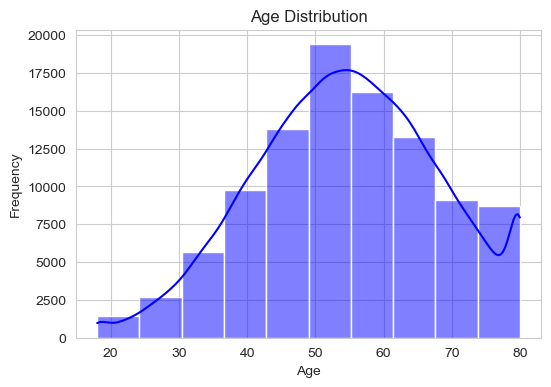

In [26]:
# Age Distribution Plot
plt.figure(figsize=(6,4))
sns.histplot(demo["Age"], bins=10, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## Gender

In [27]:
# Gender Distribution
gender_counts = demo["Gender"].value_counts()
gender_counts

Gender
Male      49853
Female    45078
Other      5069
Name: count, dtype: int64

/var/folders/sv/tqkwxbbd1l96g8tr45l86pmw0000gn/T/ipykernel_17767/1507335075.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=demo["Gender"], palette="pastel")


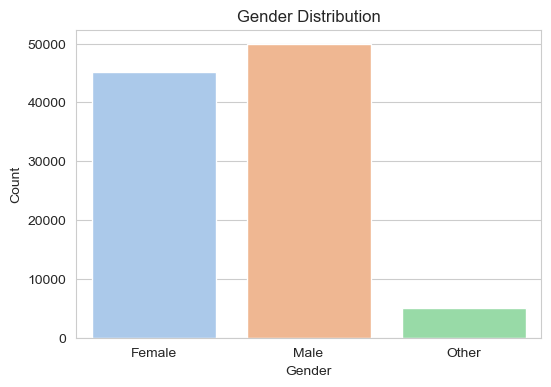

In [28]:
# Gender Count Plot
plt.figure(figsize=(6,4))
sns.countplot(x=demo["Gender"], palette="pastel")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

## Income

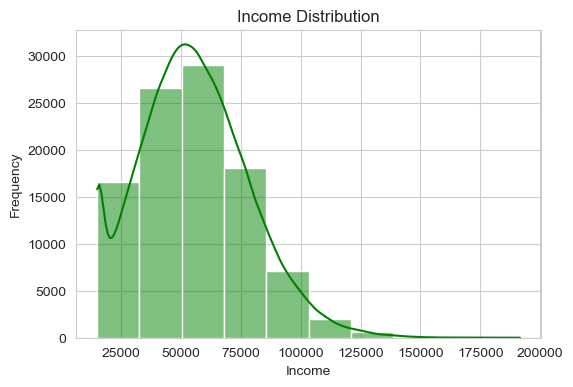

In [29]:
# Income Distribution Plot
plt.figure(figsize=(6,4))
sns.histplot(demo["Income"], bins=10, kde=True, color="green")
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

### Income across gender

/var/folders/sv/tqkwxbbd1l96g8tr45l86pmw0000gn/T/ipykernel_17767/1726537035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="Income", data=demo, palette={"Male": "blue", "Female": "pink", "Other":"yellow"})


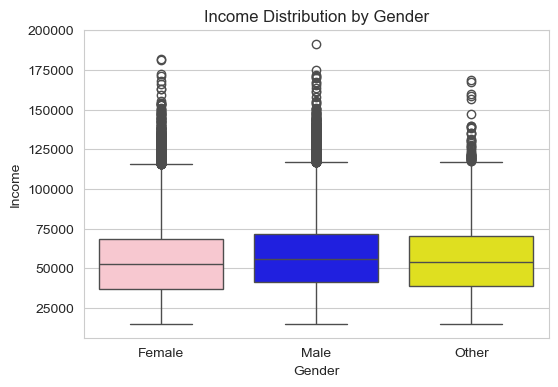

In [30]:
# Compare income distribution between male and female
plt.figure(figsize=(6,4))
sns.boxplot(x="Gender", y="Income", data=demo, palette={"Male": "blue", "Female": "pink", "Other":"yellow"})
plt.title("Income Distribution by Gender")
plt.show()

## Location

In [31]:
# Most common customer locations
top_locations = demo["Location"].value_counts().head(5)
top_locations

Location
New Michael      105
Port Michael      87
South Michael     85
North Michael     85
West Michael      84
Name: count, dtype: int64

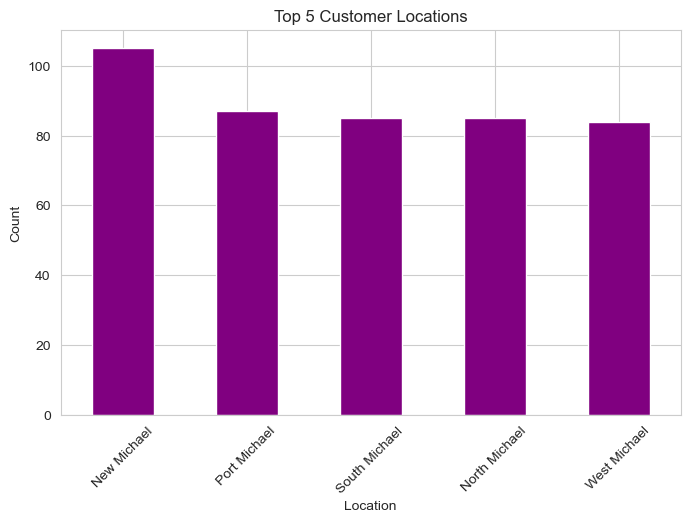

In [32]:
plt.figure(figsize=(8,5))
top_locations.plot(kind="bar", color="purple")
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Top 5 Customer Locations")
plt.xticks(rotation=45)
plt.show()

# Demo Clustering
Based on full demo data (w/o mapping to sub data's segmentation), the most determinant factor on clustering is `income`. No big difference across various genders and/or ages.
## By age and income

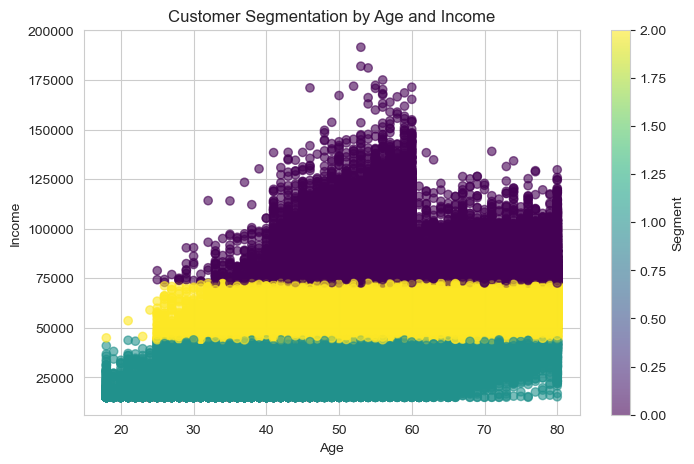

In [33]:
from sklearn.cluster import KMeans

# Select numerical features for clustering
X = demo[["Age", "Income"]]

# Apply K-Means with 3 clusters (Low, Mid, High)
kmeans = KMeans(n_clusters=3, random_state=42)
demo["Segment"] = kmeans.fit_predict(X)

# Visualizing clusters
plt.figure(figsize=(8,5))
plt.scatter(demo["Age"], demo["Income"], c=demo["Segment"], cmap="viridis", alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Customer Segmentation by Age and Income")
plt.colorbar(label="Segment")
plt.show()

## By age and gender

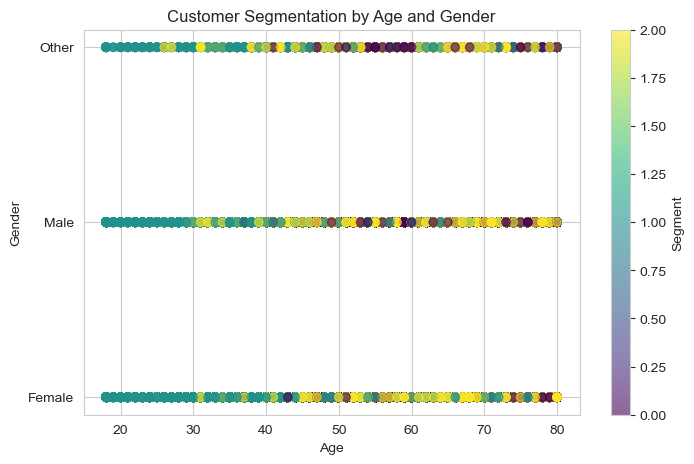

In [34]:
# Visualizing clusters
plt.figure(figsize=(8,5))
plt.scatter(demo["Age"], demo["Gender"], c=demo["Segment"], cmap="viridis", alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Gender")
plt.title("Customer Segmentation by Age and Gender")
plt.colorbar(label="Segment")
plt.show()

## By gender and income

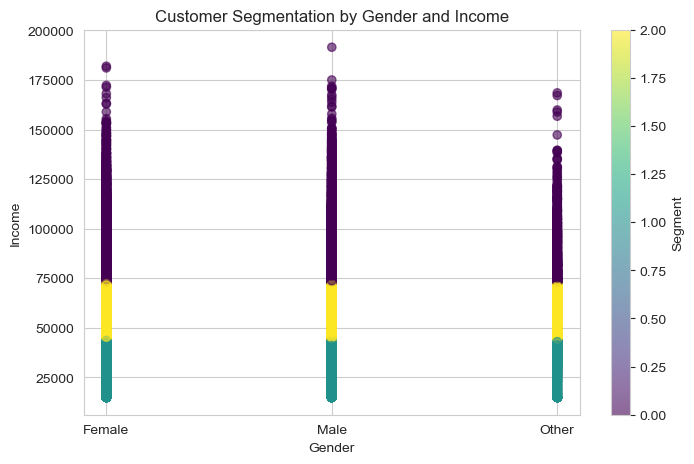

In [35]:
# Visualizing clusters
plt.figure(figsize=(8,5))
plt.scatter(demo["Gender"], demo["Income"], c=demo["Segment"], cmap="viridis", alpha=0.6)
plt.xlabel("Gender")
plt.ylabel("Income")
plt.title("Customer Segmentation by Gender and Income")
plt.colorbar(label="Segment")
plt.show()

# Demo across HML
## Merge demo w sub

In [10]:
demo = pd.read_csv('/Users/vivianyan/Desktop/NYU_Capstone_Project/Data/demo_data.csv')
sub = pd.read_csv('/Users/vivianyan/Desktop/NYU_Capstone_Project/Data/sub_segment.csv')
sub_low = sub[sub.segment==1]
sub_mid = sub[sub.segment==2]
sub_high = sub[sub.segment==3]

In [16]:
sub_low_demo = sub_low.merge(demo, how='inner', on='Capstone_id')
sub_mid_demo = sub_mid.merge(demo, how='inner', on='Capstone_id')
sub_high_demo = sub_high.merge(demo, how='inner', on='Capstone_id')
full = sub.merge(demo, how='inner', on='Capstone_id')

Check id overlapping in sub and demo

In [14]:
print('IDs in demo and sub: ', demo.Capstone_id.isin(sub_low.Capstone_id).sum(),
demo.Capstone_id.isin(sub_mid.Capstone_id).sum(),
demo.Capstone_id.isin(sub_high.Capstone_id).sum())
print('Merged df shape: ', sub_low_demo.shape[0], sub_mid_demo.shape[0], sub_high_demo.shape[0])

IDs in demo and sub:  35234 23111 32574
Merged df shape:  37283 24374 34944


## Age/Income/Gender Distribution

/var/folders/sv/tqkwxbbd1l96g8tr45l86pmw0000gn/T/ipykernel_17767/450430932.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="segment", y="Age", data=full, palette="coolwarm", ax=axes[0])
/var/folders/sv/tqkwxbbd1l96g8tr45l86pmw0000gn/T/ipykernel_17767/450430932.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="segment", y="Income", data=full, palette="viridis", ax=axes[1])


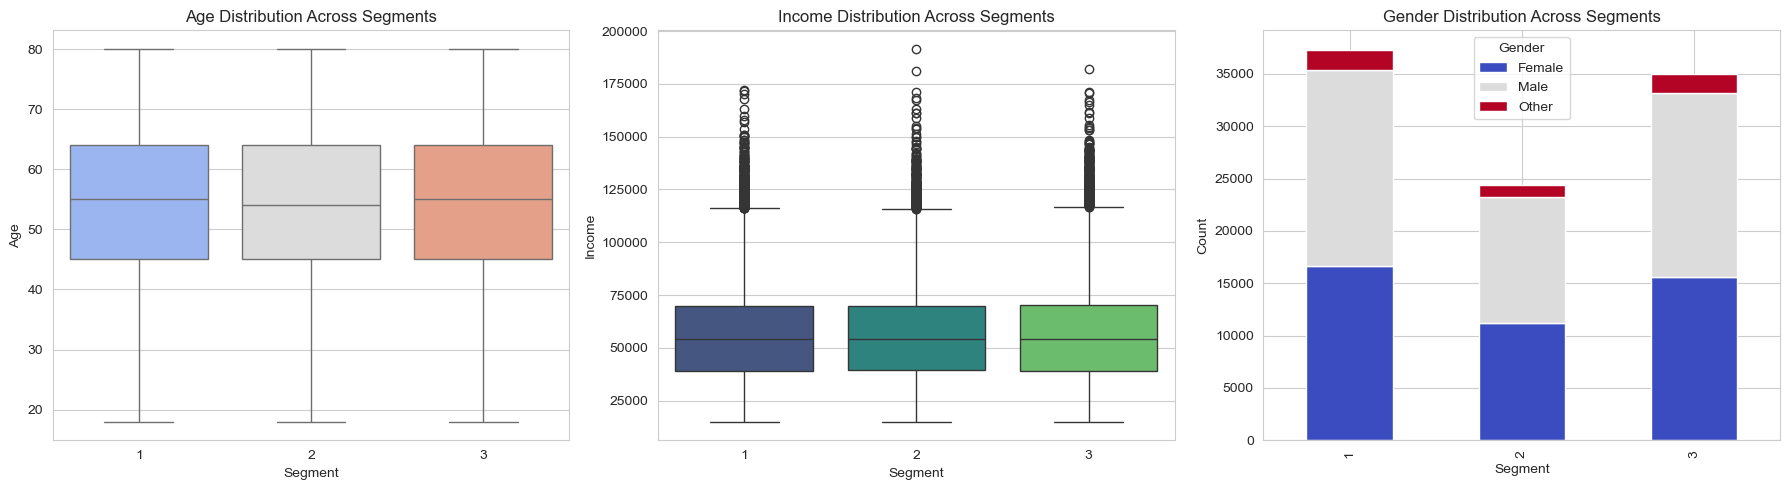

In [19]:
# Set style for plots
sns.set_style("whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age Distribution (Histogram)
sns.boxplot(x="segment", y="Age", data=full, palette="coolwarm", ax=axes[0])
axes[0].set_title("Age Distribution Across Segments")
axes[0].set_xlabel("Segment")
axes[0].set_ylabel("Age")

# Income Distribution (Histogram)
sns.boxplot(x="segment", y="Income", data=full, palette="viridis", ax=axes[1])
axes[1].set_title("Income Distribution Across Segments")
axes[1].set_xlabel("Segment")
axes[1].set_ylabel("Income")

# Gender Distribution (Bar Plot)
gender_counts = full.groupby(["segment", "Gender"]).size().unstack()
gender_counts.plot(kind="bar", stacked=True, colormap="coolwarm", ax=axes[2])
axes[2].set_title("Gender Distribution Across Segments")
axes[2].set_xlabel("Segment")
axes[2].set_ylabel("Count")
axes[2].legend(title="Gender")

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

## Sub stats visualize

In [21]:
sub_low_demo.columns

Index(['Unnamed: 0', 'total_recency', 'SUB_START', 'SUB_END', 'FREQUENCY',
       'CURRENT_TERM', 'MONETARY', 'REVENUE', 'RESUBSCRIBER', 'BRAND',
       'Capstone_id', 'recency', 'term_num', 'total_monetary', 'monetary_1',
       'monetary_2', 'recency_cluster', 'frequency_cluster',
       'monetary_cluster', 'score', 'segment', 'Age', 'Gender', 'Location',
       'Email', 'Income'],
      dtype='object')

In [23]:
eda_low = {
    "Total Low-Value Customers": len(sub_low_demo),
    "Unique Brands": sub_low_demo["BRAND"].nunique(),
    "Subscription Terms": sub_low_demo["CURRENT_TERM"].value_counts().to_dict(),
    "Average Recency": sub_low_demo["recency"].mean(),
    "Average Frequency": sub_low_demo["FREQUENCY"].mean(),
    "Average Monetary Value": sub_low_demo["monetary_1"].mean(),
    "Resubscriber Rate": sub_low_demo["RESUBSCRIBER"].mean(),
    "Age Distribution": sub_low_demo["Age"].describe(),
    "Income Distribution": sub_low_demo["Income"].describe(),
    "Gender Distribution": sub_low_demo["Gender"].value_counts(normalize=True).to_dict(),
    "Location Breakdown": sub_low_demo["Location"].value_counts().head(5).to_dict(),
}

eda_mid = {
    "Total Low-Value Customers": len(sub_mid_demo),
    "Unique Brands": sub_mid_demo["BRAND"].nunique(),
    "Subscription Terms": sub_mid_demo["CURRENT_TERM"].value_counts().to_dict(),
    "Average Recency": sub_mid_demo["recency"].mean(),
    "Average Frequency": sub_mid_demo["FREQUENCY"].mean(),
    "Average Monetary Value": sub_mid_demo["monetary_1"].mean(),
    "Resubscriber Rate": sub_mid_demo["RESUBSCRIBER"].mean(),
    "Age Distribution": sub_mid_demo["Age"].describe(),
    "Income Distribution": sub_mid_demo["Income"].describe(),
    "Gender Distribution": sub_mid_demo["Gender"].value_counts(normalize=True).to_dict(),
    "Location Breakdown": sub_mid_demo["Location"].value_counts().head(5).to_dict(),
}

eda_high = {
    "Total Low-Value Customers": len(sub_high_demo),
    "Unique Brands": sub_high_demo["BRAND"].nunique(),
    "Subscription Terms": sub_high_demo["CURRENT_TERM"].value_counts().to_dict(),
    "Average Recency": sub_high_demo["recency"].mean(),
    "Average Frequency": sub_high_demo["FREQUENCY"].mean(),
    "Average Monetary Value": sub_high_demo["monetary_1"].mean(),
    "Resubscriber Rate": sub_high_demo["RESUBSCRIBER"].mean(),
    "Age Distribution": sub_high_demo["Age"].describe(),
    "Income Distribution": sub_high_demo["Income"].describe(),
    "Gender Distribution": sub_high_demo["Gender"].value_counts(normalize=True).to_dict(),
    "Location Breakdown": sub_high_demo["Location"].value_counts().head(5).to_dict(),
}

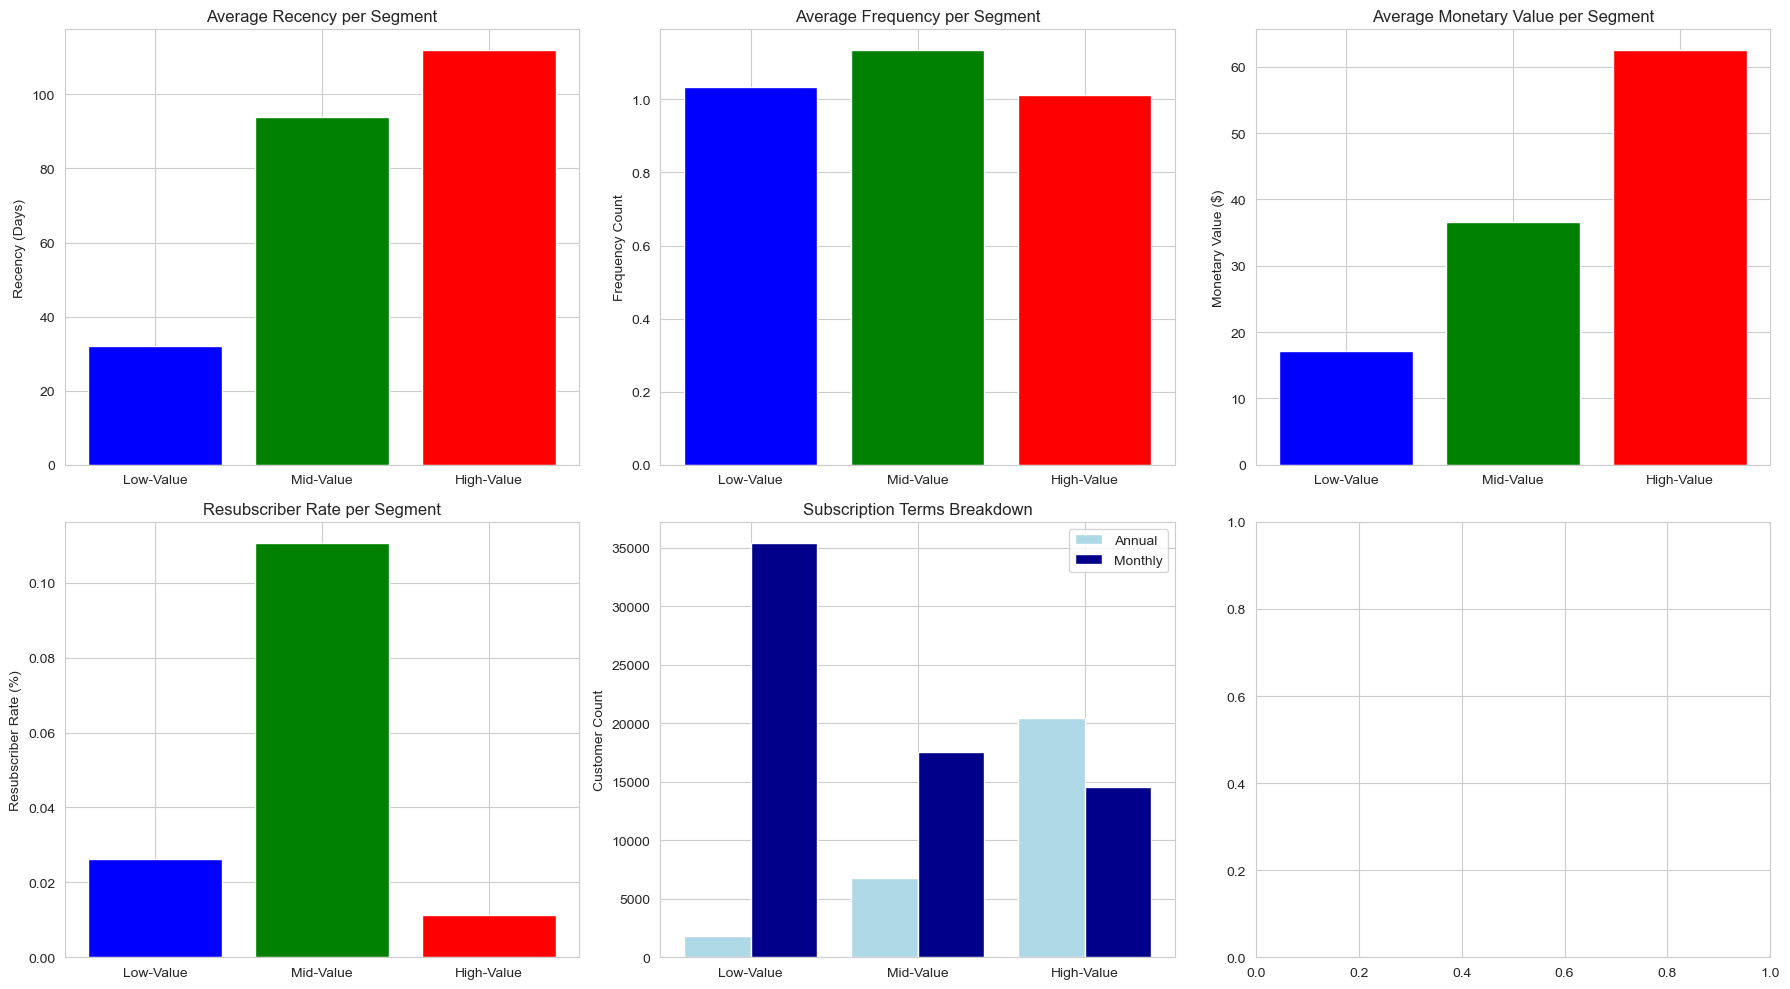

In [24]:
# Extract values for visualization
segments = ["Low-Value", "Mid-Value", "High-Value"]
avg_revenue = [
    eda_low["Average Recency"],
    eda_mid["Average Recency"],
    eda_high["Average Recency"]
]
avg_frequency = [
    eda_low["Average Frequency"],
    eda_mid["Average Frequency"],
    eda_high["Average Frequency"]
]
avg_monetary = [
    eda_low["Average Monetary Value"],
    eda_mid["Average Monetary Value"],
    eda_high["Average Monetary Value"]
]
resubscriber_rate = [
    eda_low["Resubscriber Rate"],
    eda_mid["Resubscriber Rate"],
    eda_high["Resubscriber Rate"]
]
subscription_terms = {
    "Annual": [
        eda_low["Subscription Terms"].get("annual", 0),
        eda_mid["Subscription Terms"].get("annual", 0),
        eda_high["Subscription Terms"].get("annual", 0)
    ],
    "Monthly": [
        eda_low["Subscription Terms"].get("monthly", 0),
        eda_mid["Subscription Terms"].get("monthly", 0),
        eda_high["Subscription Terms"].get("monthly", 0)
    ]
}

# Extract key metrics for visualization
segments = ["Low-Value", "Mid-Value", "High-Value"]

# Data to be visualized
avg_recency = [
    eda_low["Average Recency"],
    eda_mid["Average Recency"],
    eda_high["Average Recency"]
]

avg_frequency = [
    eda_low["Average Frequency"],
    eda_mid["Average Frequency"],
    eda_high["Average Frequency"]
]

avg_monetary = [
    eda_low["Average Monetary Value"],
    eda_mid["Average Monetary Value"],
    eda_high["Average Monetary Value"]
]

resubscriber_rate = [
    eda_low["Resubscriber Rate"],
    eda_mid["Resubscriber Rate"],
    eda_high["Resubscriber Rate"]
]

# Subscription Terms Breakdown
subscription_terms = {
    "Annual": [
        eda_low["Subscription Terms"].get("annual", 0),
        eda_mid["Subscription Terms"].get("annual", 0),
        eda_high["Subscription Terms"].get("annual", 0)
    ],
    "Monthly": [
        eda_low["Subscription Terms"].get("monthly", 0),
        eda_mid["Subscription Terms"].get("monthly", 0),
        eda_high["Subscription Terms"].get("monthly", 0)
    ]
}

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot Average Recency
axes[0, 0].bar(segments, avg_recency, color=['blue', 'green', 'red'])
axes[0, 0].set_title("Average Recency per Segment")
axes[0, 0].set_ylabel("Recency (Days)")

# Plot Average Frequency
axes[0, 1].bar(segments, avg_frequency, color=['blue', 'green', 'red'])
axes[0, 1].set_title("Average Frequency per Segment")
axes[0, 1].set_ylabel("Frequency Count")

# Plot Average Monetary Value
axes[0, 2].bar(segments, avg_monetary, color=['blue', 'green', 'red'])
axes[0, 2].set_title("Average Monetary Value per Segment")
axes[0, 2].set_ylabel("Monetary Value ($)")

# Plot Resubscriber Rate
axes[1, 0].bar(segments, resubscriber_rate, color=['blue', 'green', 'red'])
axes[1, 0].set_title("Resubscriber Rate per Segment")
axes[1, 0].set_ylabel("Resubscriber Rate (%)")

# Plot Subscription Term Distribution
x = np.arange(len(segments))
width = 0.4

axes[1, 1].bar(x - width/2, subscription_terms["Annual"], width, label='Annual', color='lightblue')
axes[1, 1].bar(x + width/2, subscription_terms["Monthly"], width, label='Monthly', color='darkblue')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(segments)
axes[1, 1].set_title("Subscription Terms Breakdown")
axes[1, 1].set_ylabel("Customer Count")
axes[1, 1].legend()

# Display plots
plt.tight_layout()
plt.show()

## Demo stats visualize

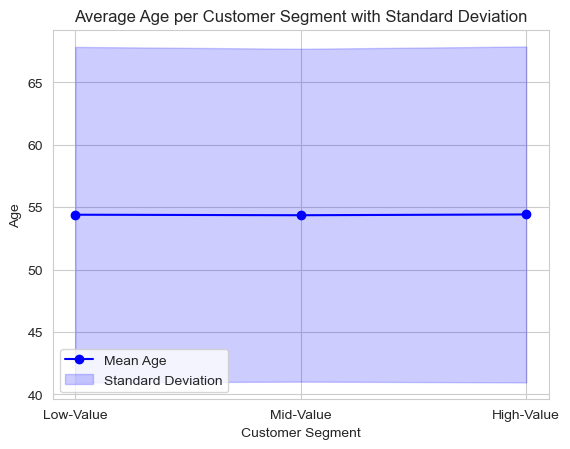

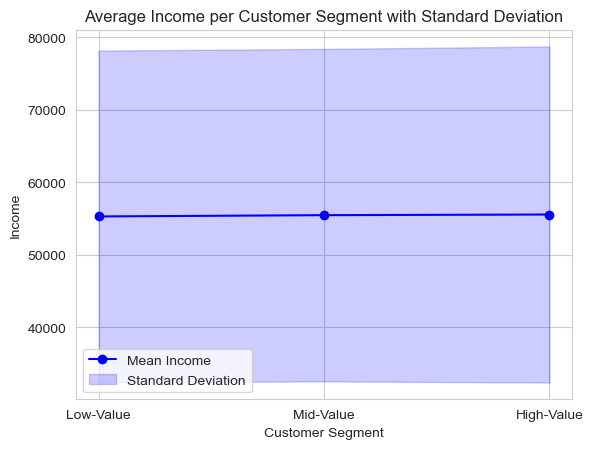

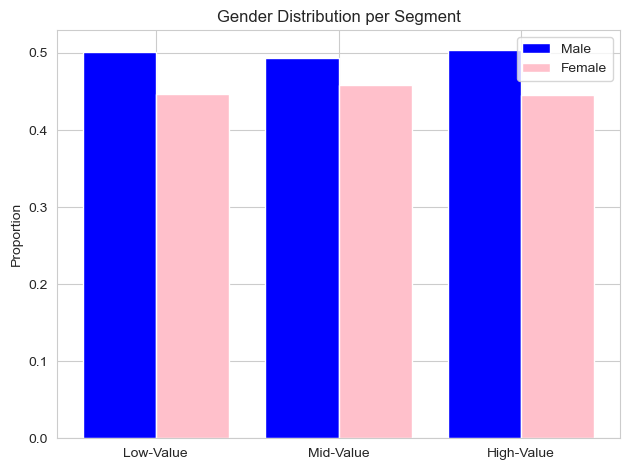

In [25]:
# Extracting relevant data from the summary dictionaries
segments = ["Low-Value", "Mid-Value", "High-Value"]

# Age statistics
age_mean = [
    eda_low["Age Distribution"]["mean"],
    eda_mid["Age Distribution"]["mean"],
    eda_high["Age Distribution"]["mean"]
]

age_std = [
    eda_low["Age Distribution"]["std"],
    eda_mid["Age Distribution"]["std"],
    eda_high["Age Distribution"]["std"]
]

# Convert segments into numerical indices for plotting
x = np.arange(len(segments))

# Plot the line graph for Age Mean
plt.plot(x, age_mean, marker='o', linestyle='-', color='blue', label="Mean Age")

# Add shaded region for standard deviation (Error bars)
plt.fill_between(x, np.array(age_mean) - np.array(age_std), np.array(age_mean) + np.array(age_std), 
                 color='blue', alpha=0.2, label="Standard Deviation")

# Customize the plot
plt.xticks(x, segments)  # Set x-axis labels
plt.xlabel("Customer Segment")
plt.ylabel("Age")
plt.title("Average Age per Customer Segment with Standard Deviation")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Income statistics
income_mean = [
    eda_low["Income Distribution"]["mean"],
    eda_mid["Income Distribution"]["mean"],
    eda_high["Income Distribution"]["mean"]
]

income_std = [
    eda_low["Income Distribution"]["std"],
    eda_mid["Income Distribution"]["std"],
    eda_high["Income Distribution"]["std"]
]

# Convert segments into numerical indices for plotting
x = np.arange(len(segments))

# Plot the line graph for Age Mean
plt.plot(x, income_mean, marker='o', linestyle='-', color='blue', label="Mean Income")

# Add shaded region for standard deviation (Error bars)
plt.fill_between(x, np.array(income_mean) - np.array(income_std), np.array(income_mean) + np.array(income_std), 
                 color='blue', alpha=0.2, label="Standard Deviation")

# Customize the plot
plt.xticks(x, segments)  # Set x-axis labels
plt.xlabel("Customer Segment")
plt.ylabel("Income")
plt.title("Average Income per Customer Segment with Standard Deviation")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Gender distribution
gender_male = [
    eda_low["Gender Distribution"].get("Male", 0),
    eda_mid["Gender Distribution"].get("Male", 0),
    eda_high["Gender Distribution"].get("Male", 0)
]

gender_female = [
    eda_low["Gender Distribution"].get("Female", 0),
    eda_mid["Gender Distribution"].get("Female", 0),
    eda_high["Gender Distribution"].get("Female", 0)
]

plt.bar(x - width / 2, gender_male, width, label='Male', color='blue')
plt.bar(x + width / 2, gender_female, width, label='Female', color='pink')
plt.xticks(x, labels=segments)
plt.title("Gender Distribution per Segment")
plt.ylabel("Proportion")
plt.legend()

# Display plots
plt.tight_layout()
plt.show()